## Telco Customer Churn Prediction

### Dataset Description
**Dataset Name:** Telco Customer Churn Dataset  
**Provider:** Kaggle

The Telco Customer Churn dataset contains information about a telecommunications company's customers and their subscription details. The dataset is used to predict whether a customer will churn (leave the company) based on various features.

**Columns:**
- `customerID`: Unique identifier for each customer
- `gender`: Gender of the customer (Male/Female)
- `SeniorCitizen`: Whether the customer is a senior citizen (1: Yes, 0: No)
- `Partner`: Whether the customer has a partner (Yes/No)
- `Dependents`: Whether the customer has dependents (Yes/No)
- `tenure`: Number of months the customer has stayed with the company
- `PhoneService`: Whether the customer has a phone service (Yes/No)
- `MultipleLines`: Whether the customer has multiple lines (Yes/No/No phone service)
- `InternetService`: Customer's internet service provider (DSL/Fiber optic/No)
- `OnlineSecurity`: Whether the customer has online security (Yes/No/No internet service)
- `OnlineBackup`: Whether the customer has online backup (Yes/No/No internet service)
- `DeviceProtection`: Whether the customer has device protection (Yes/No/No internet service)
- `TechSupport`: Whether the customer has tech support (Yes/No/No internet service)
- `StreamingTV`: Whether the customer has streaming TV service (Yes/No/No internet service)
- `StreamingMovies`: Whether the customer has streaming movies service (Yes/No/No internet service)
- `Contract`: Type of contract the customer has (Month-to-month/One year/Two year)
- `PaperlessBilling`: Whether the customer has paperless billing (Yes/No)
- `PaymentMethod`: Customer's payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic))
- `MonthlyCharges`: The amount charged to the customer monthly
- `TotalCharges`: The total amount charged to the customer
- `Churn`: Whether the customer churned (Yes/No)

### Project Description
In this project, we aim to build a model to predict customer churn using various machine learning techniques. We will utilize cross-validation and grid search to determine the optimal parameters for each model. The models used include Logistic Regression, Random Forest, and Support Vector Machine (SVM). We will then compare these models using ROC-AUC scores and confusion matrices to select the best model.


# Step 1: Load and Explore the Dataset
First, we'll load the dataset and explore its structure. We'll check for missing values and understand the distribution of different features.


In [2]:
import pandas as pd
import os

# Load the dataset
path = r'C:\Users\hassa\OneDrive\المستندات\Machine learning files\Telco-Customer-Churn\Telco-Customer-Churn.csv'
df = pd.read_csv(path)

# Display the first few rows of the dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Note the TotalCharges is in the object type even though it might be a numeric

# Step 2: Data Preprocessing
We'll handle missing values, encode categorical variables, and split the data into training and testing sets.


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into training and testing sets
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Exploratory Data Analysis (EDA)
We'll visualize the distribution of features and explore the relationships between features and the target variable.


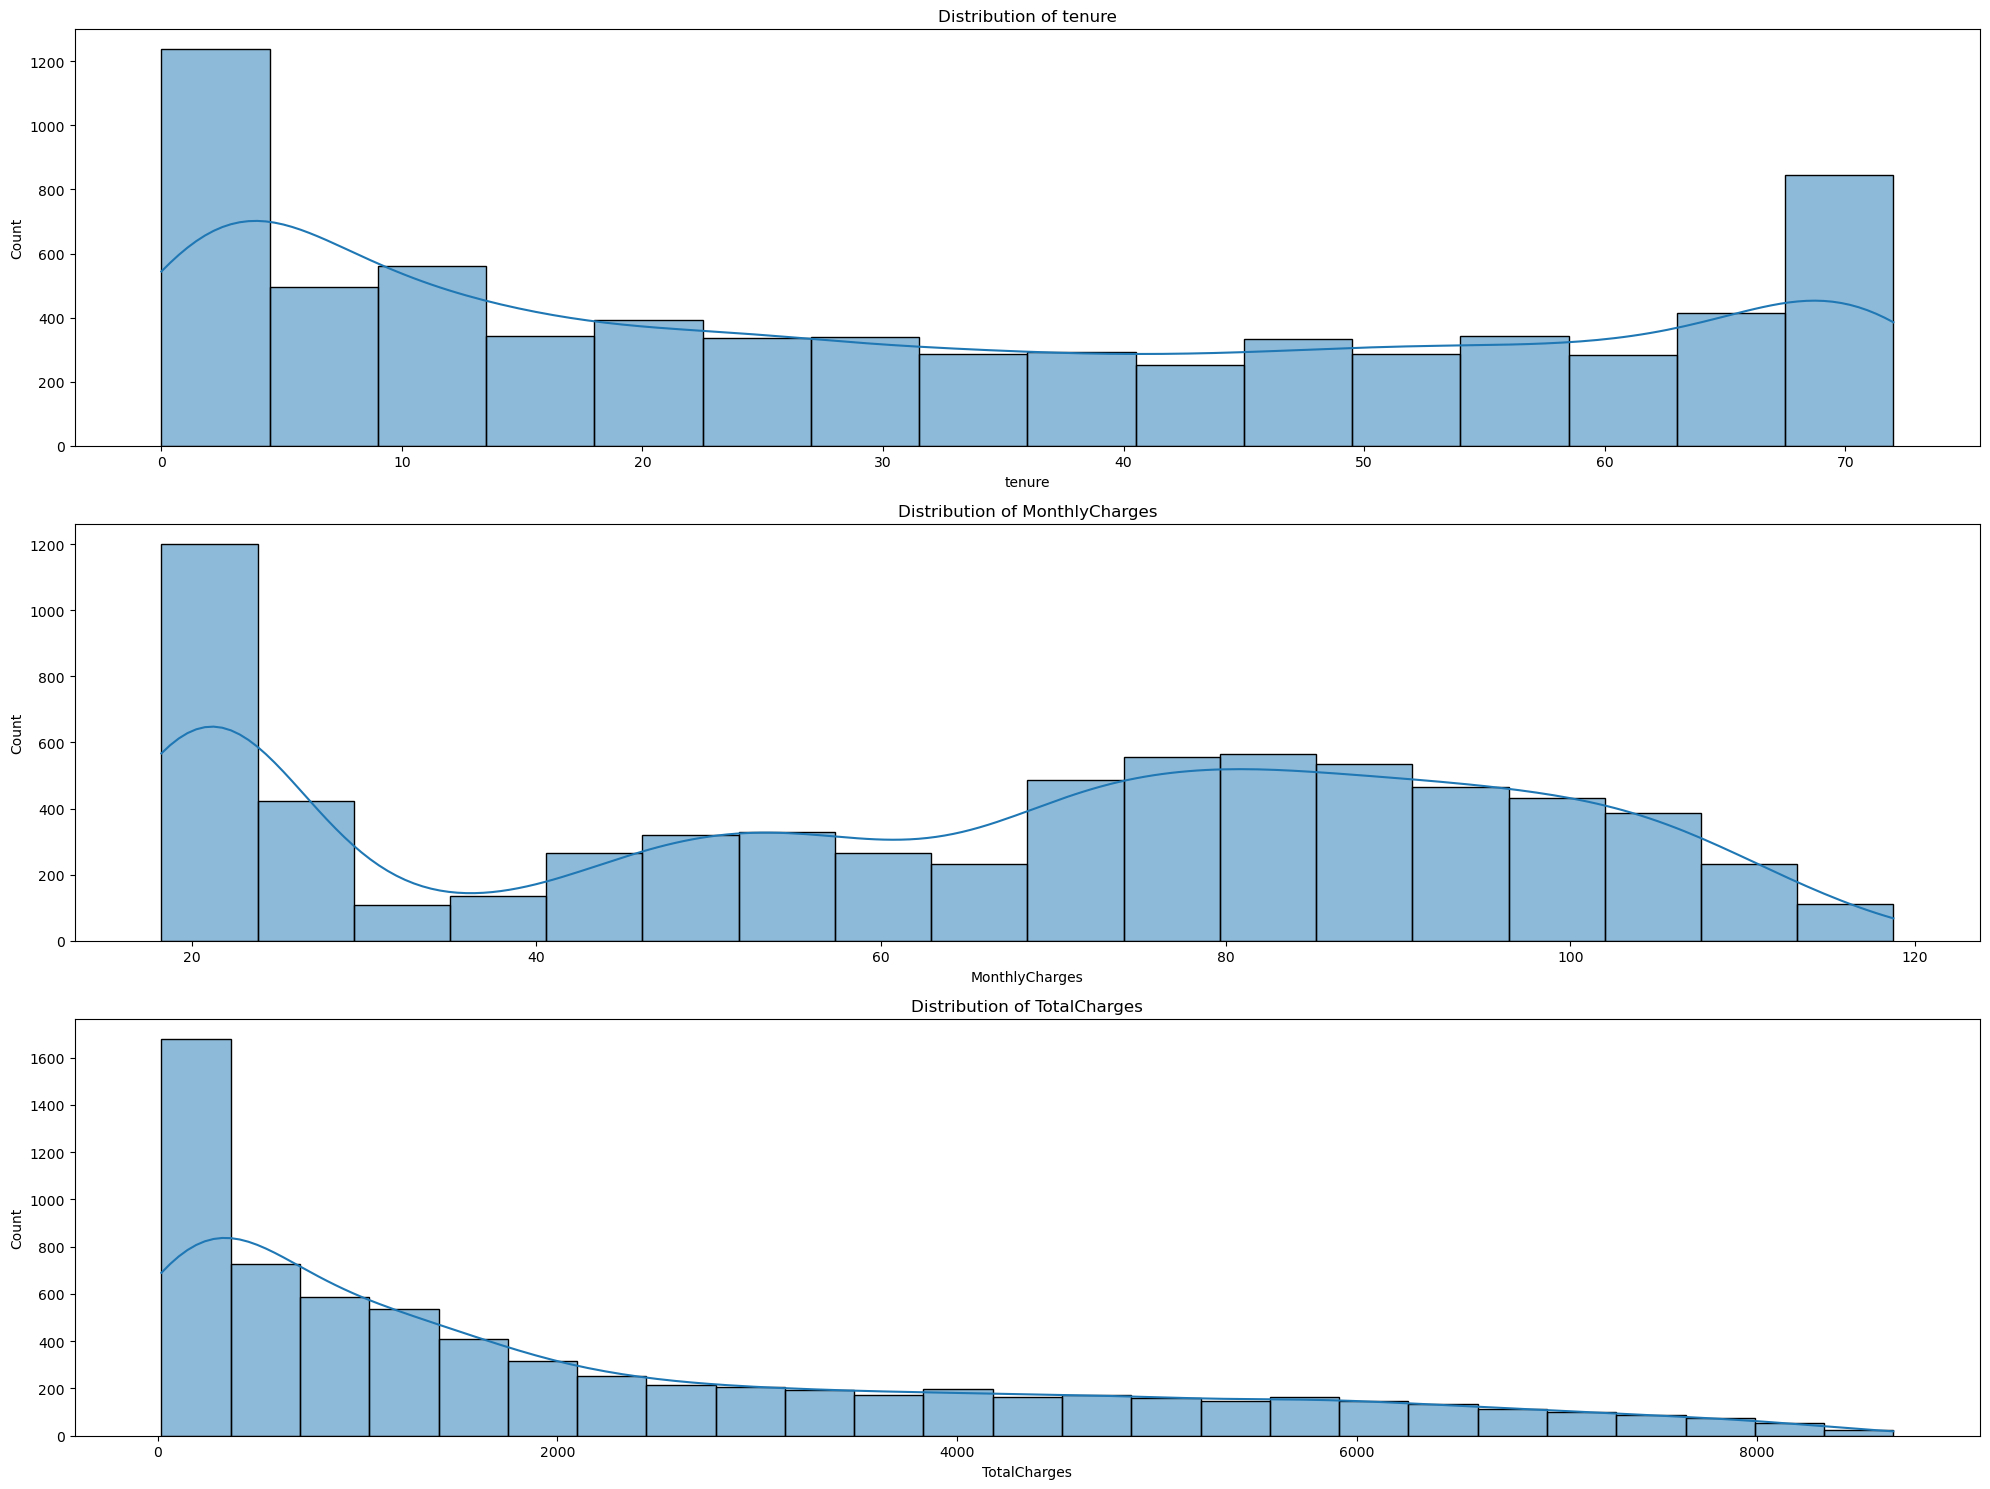

<Figure size 640x480 with 0 Axes>

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of numerical features
plt.figure(figsize=(20, 15))
for i, column in enumerate(['tenure', 'MonthlyCharges', 'TotalCharges']):
    plt.subplot(3, 1, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()
plt.savefig('hist-plot', dpi = 300)

**Distribution of Tenure, Monthly Charges,  and TotalCharges:** Shows the distribution of tenure and MonthlyCharges among customers.

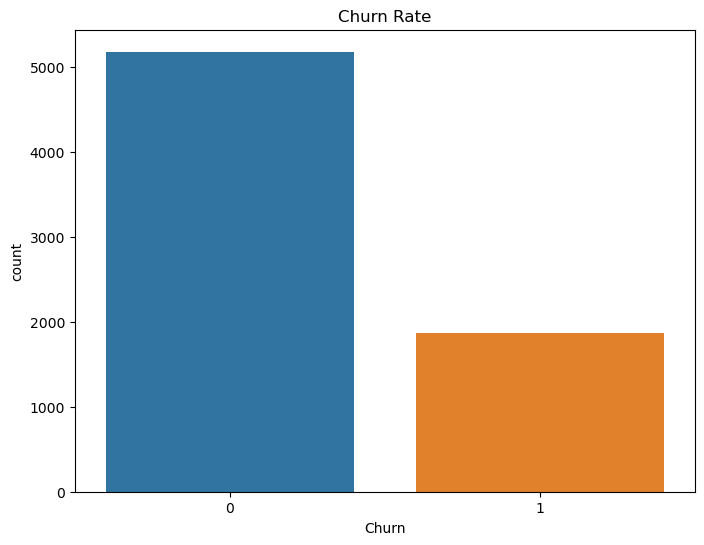

<Figure size 640x480 with 0 Axes>

In [52]:
# Churn rate
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Rate')
plt.show()
plt.savefig('count-plot', dpi = 300)

 **Churn Rate Plot:** Displays the count of customers who churned and those who did not.

# Step 4: Feature Engineering
We'll create new features based on the existing data to enhance the predictive power of our model.


In [24]:
# Example of feature engineering
df['MonthlyChargesPerTenure'] = df['MonthlyCharges'] / (df['tenure'] + 1)
X['MonthlyChargesPerTenure'] = X['MonthlyCharges'] / (X['tenure'] + 1)

# Step 5: Model Building and Evaluation
We'll build and evaluate different models using cross-validation and grid search for hyperparameter tuning. We'll use ROC-AUC to compare the models and choose the best one.


## Step 5.1: Logistic Regression
We'll start by building and evaluating a Logistic Regression model. We'll use GridSearchCV to find the best hyperparameters and plot the confusion matrix.


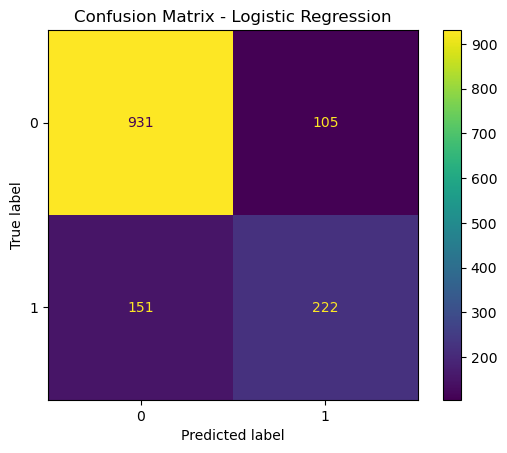

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
param_grid = {'C': [0.01, 0.1, 1, 10]}
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)
logreg_cv.fit(X_train, y_train)
logreg_best = logreg_cv.best_estimator_

# Predict and evaluate
y_pred_logreg = logreg_best.predict(X_test)
logreg_roc_auc = roc_auc_score(y_test, logreg_best.predict_proba(X_test)[:, 1])

# Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
ConfusionMatrixDisplay(cm_logreg).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Step 5.2: Random Forest
Next, we'll build and evaluate a Random Forest model. We'll use GridSearchCV to find the best hyperparameters and plot the confusion matrix.


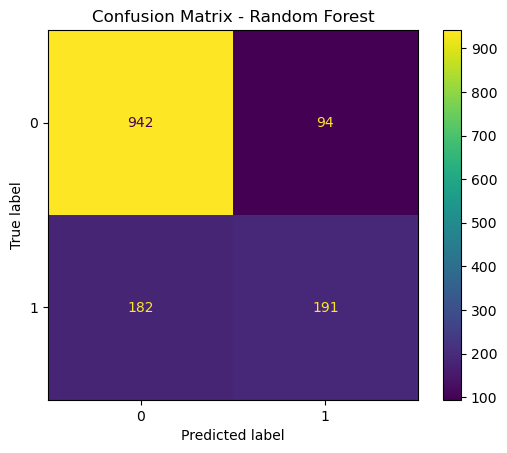

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf_cv = GridSearchCV(rf, param_grid, cv=5)
rf_cv.fit(X_train, y_train)
rf_best = rf_cv.best_estimator_

# Predict and evaluate
y_pred_rf = rf_best.predict(X_test)
rf_roc_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm_rf).plot()
plt.title('Confusion Matrix - Random Forest')
plt.show()

## Step 5.3: Support Vector Machine (SVM)
Next, we'll build and evaluate a Support Vector Machine model. We'll use GridSearchCV to find the best hyperparameters and plot the confusion matrix.


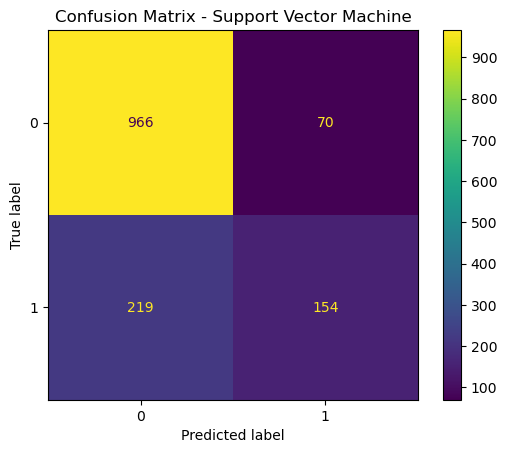

In [39]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True)
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1]}
svm_cv = GridSearchCV(svm, param_grid, cv=5)
svm_cv.fit(X_train, y_train)
svm_best = svm_cv.best_estimator_

# Predict and evaluate
y_pred_svm = svm_best.predict(X_test)
svm_roc_auc = roc_auc_score(y_test, svm_best.predict_proba(X_test)[:, 1])

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
ConfusionMatrixDisplay(cm_svm).plot()
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

## Step 5.4: Comparison of Models
We'll compare the performance of the models using the ROC-AUC score and the confusion matrix.


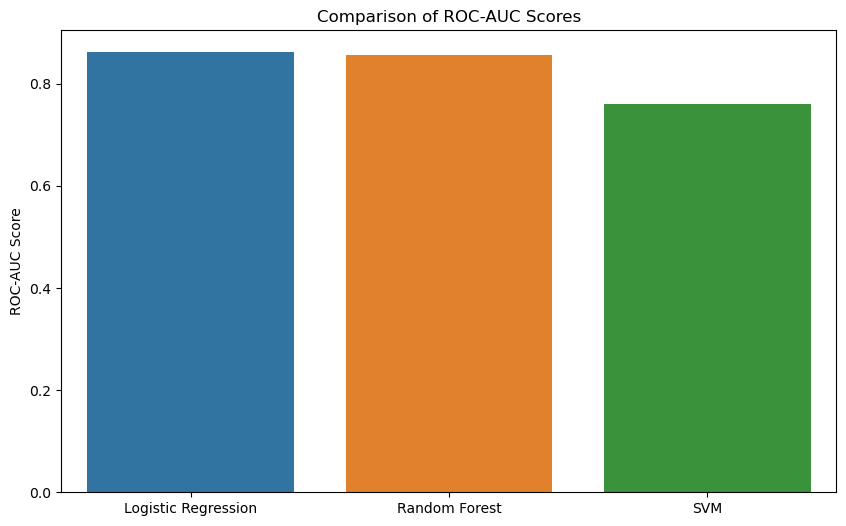

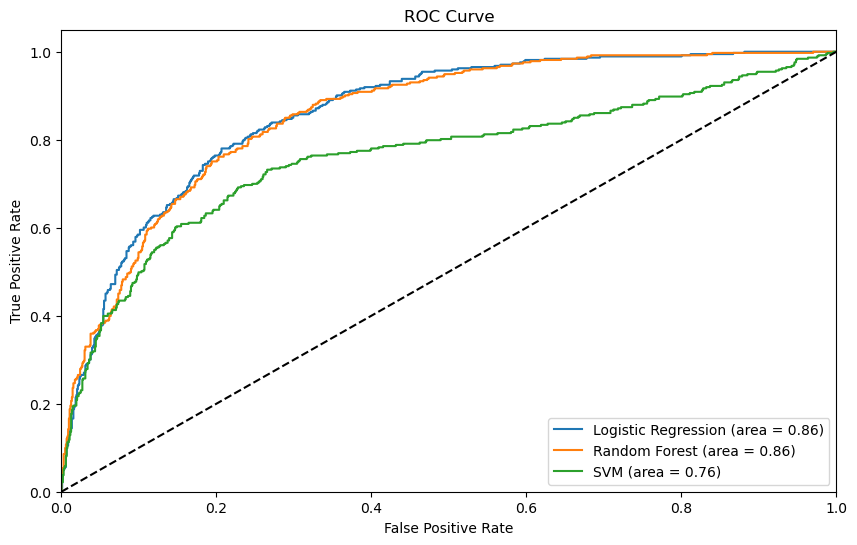

<Figure size 640x480 with 0 Axes>

In [54]:
# Compare ROC-AUC scores
models = ['Logistic Regression', 'Random Forest', 'SVM']
roc_aucs = [logreg_roc_auc, rf_roc_auc, svm_roc_auc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=roc_aucs)
plt.ylabel('ROC-AUC Score')
plt.title('Comparison of ROC-AUC Scores')
plt.show()

# Plot ROC Curve
plt.figure(figsize=(10, 6))
for model, best_model, label in zip([logreg, rf, svm], [logreg_best, rf_best, svm_best], models):
    fpr, tpr, _ = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{label} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
plt.savefig('roc-curve', dpi = 300)

## Final Results
The ROC curve shows that Logistic Regression and Random Forest models perform similarly with an AUC of 0.86, while the SVM model has a lower AUC of 0.76. Based on the ROC curves and confusion matrices, the Logistic Regression and Random Forest models are the best performing models for predicting customer churn.
